In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


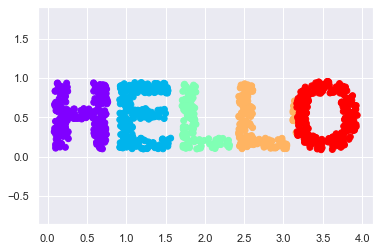

In [3]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

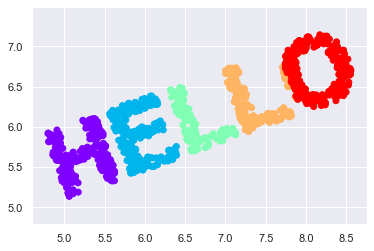

In [5]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의 길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬 회전
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R) # 1000x2 2x2 => 1000x2
X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


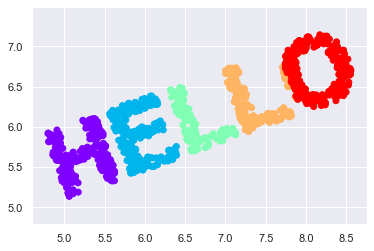

In [6]:
print(X.shape)
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 - 호의길이
    R = [[np.cos(theta), np.sin(theta)], # 2차원 행렬회전 # cos값은 1 -> x축 , 이때 y축은0 이어야 하므로 sin
        [-np.sin(theta), np.cos(theta)]]
    print(type(R))
    return np.dot(X,R) # 1000 곱하기 2 # R은 2x2 # 결과는 1000x2
X2 = rotate(X,20) + 5 # 20도 회전 # 5는 그자리에서 돌면 딸리니 위로 올려준것. 
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal');

(1000, 1000)


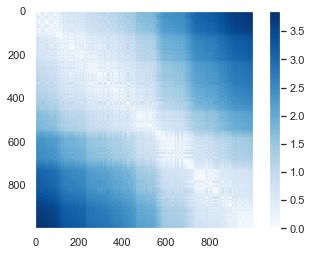

In [7]:
# 각 점들 간의 상호거리 (Euclidian Distance)
from sklearn.metrics import pairwise_distances # 디폴트 - 유클리디안
D = pairwise_distances(X)
print(D.shape)
D[:5,:5]
plt.imshow(D, zorder = 2, cmap='Blues', interpolation = 'nearest')
plt.colorbar()

In [8]:
D2 = pairwise_distances(X2)
np.allclose(D, D2) # 원형을 유지하고 있음

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


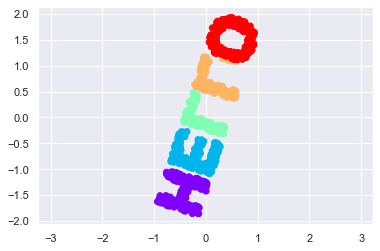

In [9]:
# 다형체
from sklearn.manifold import MDS
# 미리 계산된 거리행렬을 이용해 차원 축소함
model = MDS(n_components = 2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal');
print(out)

In [10]:
# 고유값 분해
import numpy as np
rng = np.random.RandomState(10) # seed 값
C = rng.randn(3,3) # normal
print(np.dot(C,C.T))
# 정방행렬, 대칭행렬
# 고유값 분해
e, V = np.linalg.eigh(np.dot(C, C.T))
print("eigenvector", V) # 고유벡터
print('eigenvalue', e) # 고유값
np.dot(V[1], V[2]) # 두 벡터의 내적 -> 직교한다

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [11]:
# 2차원 -> 3차원 변환
def random_projection(X, dimension=3, rseed=42): # 데이터, 차원, 시드
    assert dimension >= X.shape[1] # 차원축소는 안되고 차원 확대만 가능. shape[1]은 행. 변수 2개면 2차원
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) # 3x3
    print("C는", C.shape) # 3x3
    print(np.dot(C, C.T))
    e, V = np.linalg.eigh(np.dot(C, C.T)) # 고유치, 고유벡터
    print('V는', V.shape) # 3x3
    print('차원은', V[:X.shape[1]]) # 2차원
    return np.dot(X, V[:X.shape[1]]) # 3x2
print(X.shape)
print(X.shape[1])
print("데이터의 차원은", X.shape)
X3 = random_projection(X, 3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

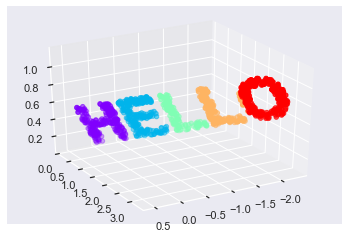

In [12]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0], X3[:, 1], X3[:,2], **colorize)
ax.view_init(azim=60, elev=30) # 카메라 각도 조절

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

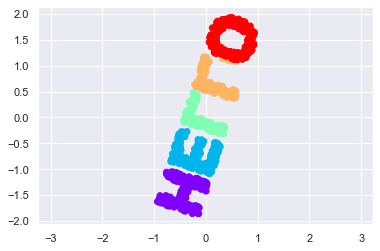

In [13]:
model = MDS(n_components =2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

NameError: name 'colorize' is not defined

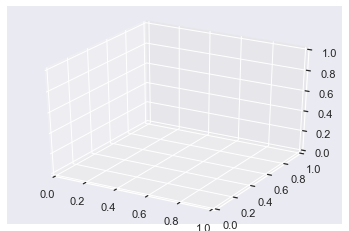

In [28]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection = '3d')
ax.scatter3D(XS[:0], XS[:,1],XS[:,2], **colorize)

# MDS는 선형에는 강하지만 비선형에는 취약하다

In [31]:
# MDS는 비선형에서 모양유지가 안됨
model = MDS(n_components =2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')

NameError: name 'colorize' is not defined

In [32]:
# LLE(Locally Linear Embedding)
- 비선형에 강함

SyntaxError: invalid syntax (<ipython-input-32-61a85bb2280f>, line 2)

NameError: name 'colorize' is not defined

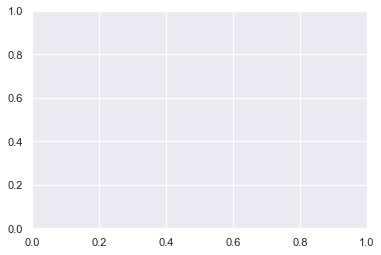

In [34]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
out = model.fit_transform(XS)
fig,ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)

In [38]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.manifold import mds
def plot_iris_mds():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = manifold.MDS(n_components=3)
    Xtrans = mds.fit_transform(X)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15)

    mds = manifold.MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 